In [1]:
# Import dependencies and file
# The dataset was obtained from CryptoCompare.
import numpy as np
import pandas as pd
from pathlib import Path
file_path = Path("crypto_data.csv")


In [2]:
# Read csv file in to dataframe
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [ ]:
crypto_df.info()

In [3]:
# Rename Unnamed column
crypto_df.rename(columns={'Unnamed: 0': 'CryptoID'}, inplace=True)
crypto_df.head()

,CryptoID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [5]:
# Drop the IsTrading column from the dataframe
crypto_df.drop(['IsTrading'], axis=1, inplace=True)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [6]:
# Remove all rows that have at least one null value
crypto_df = crypto_df.dropna()
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [7]:
# Filter for cryptocurrencies that have total coins mined 'greater than zero'
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [8]:
# Data should be numeric, delete the CoinName from the original dataframe
crypto_data_df = crypto_df[["CryptoID","Algorithm","ProofType","TotalCoinsMined","TotalCoinSupply"]].copy()
crypto_data_df.head()

,CryptoID,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [9]:
crypto_data_df=crypto_data_df.set_index("CryptoID")
crypto_data_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CryptoID,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [ ]:
# View unique values in Algorithm column
crypto_data_df['Algorithm'].unique()


In [ ]:
# View unique values in ProofType column
crypto_data_df['ProofType'].unique()

In [10]:
# Import Dependencies to convert categorical data, Algorithm and ProofType, into numerica data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Label encoding the 'Algorithm' column
crypto_data_df['Algorithm'] = LabelEncoder().fit_transform(crypto_data_df['Algorithm'])
crypto_data_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CryptoID,,,,
42,52,PoW/PoS,4.199995e+01,42
404,52,PoW/PoS,1.055185e+09,532000000
1337,66,PoW/PoS,2.927942e+10,314159265359
BTC,47,PoW,1.792718e+07,21000000
ETH,20,PoW,1.076842e+08,0
LTC,52,PoW,6.303924e+07,84000000
DASH,64,PoW/PoS,9.031294e+06,22000000
XMR,12,PoW,1.720114e+07,0
ETC,20,PoW,1.133597e+08,210000000


In [11]:
# Label encoding the 'Algorithm' column
crypto_data_df['ProofType'] = LabelEncoder().fit_transform(crypto_data_df['ProofType'])
crypto_data_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CryptoID,,,,
42,52,15,4.199995e+01,42
404,52,15,1.055185e+09,532000000
1337,66,15,2.927942e+10,314159265359
BTC,47,12,1.792718e+07,21000000
ETH,20,12,1.076842e+08,0
LTC,52,12,6.303924e+07,84000000
DASH,64,15,9.031294e+06,22000000
XMR,12,12,1.720114e+07,0
ETC,20,12,1.133597e+08,210000000


In [ ]:
crypto_data_df.info()

In [12]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_data_df)
print(scaled_data[0:10])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]
 [ 3.76459118e-01  1.67233875e-03 -1.15725815e-01 -1.51629040e-01]
 [ 1.09558390e+00  8.91356555e-01 -1.16910129e-01 -1.52545207e-01]
 [-2.02062348e+00  1.67233875e-03 -1.16730976e-01 -1.52870298e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14622363e-01 -1.49767153e-01]
 [-1.66106109e+00  1.67233875e-03 -1.16946272e-01 -1.52559984e-01]]


### Dimensionality Reduction
(1) Perform dimensionality reduction with PCA
(2) Run t-SNE on the principal components: the output of the PCA transformation
(3) Create a scatter plot of the t-SNE output

In [13]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA

In [15]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(crypto_data_df)

In [16]:
# Transform PCA data to a DataFrame
crypto_data_df_pca = pd.DataFrame(
    data=crypto_pca, index=crypto_data_df.index, columns=["principal component 1", "principal component 2"]
)
crypto_data_df_pca.head()

,principal component 1,principal component 2
CryptoID,,
42,-1.162934e+10,-5.502574e+08
404,-1.064088e+10,-1.197852e+09
1337,2.750507e+11,1.312370e+11
BTC,-1.160219e+10,-5.552767e+08
ETH,-1.157548e+10,-6.435026e+08


In [17]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.87571706, 0.12428294])

### Sample Analysis
The explained variance in the above sample states that the first principal component contains approximately 88% of the vaiance
and the second principal component contains 12% of the variance. We have approximately 100% of the information in the 
original dataset.

In [14]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=3)

# Get 3 principal components for data.
crypto_pca = pca.fit_transform(crypto_data_df)

# Transform PCA data to a DataFrame
crypto_data_df_pca = pd.DataFrame(
    data=crypto_pca, index=crypto_data_df.index, columns=["principal component 1", "principal component 2", "principal component 3"]
)
crypto_data_df_pca.head()

,principal component 1,principal component 2,principal component 3
CryptoID,,,
42,-1.162934e+10,-5.502574e+08,-6.273405
404,-1.064088e+10,-1.197852e+09,-6.253882
1337,2.750507e+11,1.312370e+11,-28.183652
BTC,-1.160219e+10,-5.552767e+08,-1.163779
ETH,-1.157548e+10,-6.435026e+08,25.820528


In [ ]:
# Fetch the explained variance
pca.explained_variance_ratio_

In [18]:
# Run t-SNE on the principal components: the output of the PCA transformation
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate =250)
tsne_features = tsne.fit_transform(crypto_data_df_pca)

In [19]:
tsne_features.shape

(532, 2)

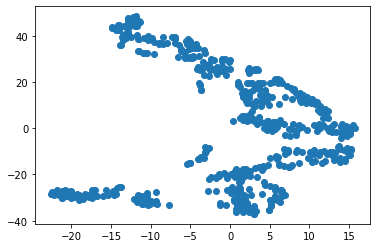

In [20]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Cluster Analysis with k-Means

In [21]:
from sklearn.cluster import KMeans

In [22]:
# Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 11))
# Same as k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_data_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23
5,6,7.859803e+22
6,7,5.562825e+22
7,8,4.056900e+22
8,9,2.972836e+22
9,10,2.174527e+22


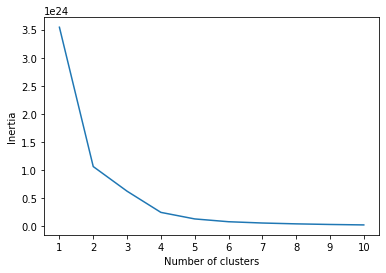

In [23]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
# Initializing model with K = 4
model = KMeans(n_clusters=4, random_state=0)

# Train the model
model.fit(crypto_data_df)

# Predict clusters
predictions = model.predict(crypto_data_df)

# Create return DataFrame with predicted clusters
crypto_data_df["class"] = model.labels_
crypto_data_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
CryptoID,,,,,
42,52,15,4.199995e+01,42,0
404,52,15,1.055185e+09,532000000,0
1337,66,15,2.927942e+10,314159265359,3
BTC,47,12,1.792718e+07,21000000,0
ETH,20,12,1.076842e+08,0,0


In [30]:
crypto_data_df["class"].unique()

array([0, 3, 2, 1], dtype=int32)

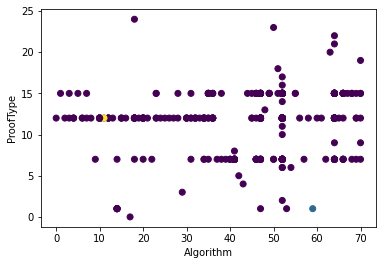

In [31]:
plt.scatter(x=crypto_data_df["Algorithm"], y=crypto_data_df['ProofType'], c=crypto_data_df['class'])
plt.xlabel('Algorithm')
plt.ylabel('ProofType')
plt.show()

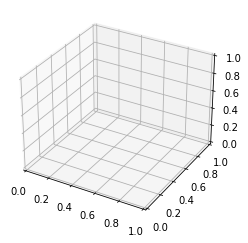

In [32]:
# Try 3D plot
# Import Dependencies
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and axes
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')


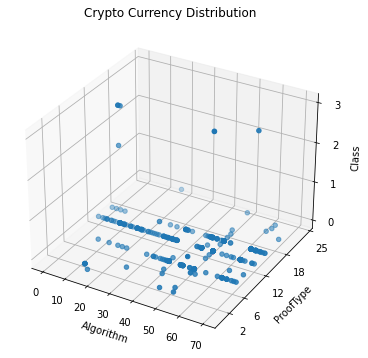

In [36]:
# Add values
xs=crypto_data_df["Algorithm"]
ys=crypto_data_df['ProofType']
zs=crypto_data_df['class']

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs)

# Label plot
ax.set_title("Crypto Currency Distribution")
ax.set_xlabel("Algorithm")
ax.set_ylabel("ProofType")
ax.set_zlabel("Class")

# Set Ticks
ax.set_yticks([2,6,12,18,25])

ax.set_zticks([0,1,2,3,4])

fig.set_size_inches(6, 6)
plt.show()